In [275]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.special import comb

# On the corners of the hypercube
The *curse of dimensionality*™ refers to counter-intuitive phenomenons happening in high dimensions. It is often illustrated by the fact that for the hypercube $[0,1]^d$ of dimension $d$, most of the volume is next to the borders. Another way to see it is: for a point $X$ drawn uniformly at random from this cube, at least one coordinate of $X$ will be $\varepsilon$ close from $0$ or $1$ with probability $1-(1-2\varepsilon)^d$.

In truth, most of the volume of the hypercube is in the corners. But which corner exactly? We computed the probability that $X$ lands $\varepsilon$ close from a $(d-1)$-face, eg an hyperplane closing the hypercube. We could also compute the probability that $X$ lands $\varepsilon$ close from a $(d-k)$-face of the hypercube, eg an affine subspace of dimension $d-k$ closing the hypercube. Let's call this volume/probability $V(\varepsilon, k , d)$. For example, in 3d, we can wonder what is the probability that $X$ lands next to an edge $V(\varepsilon,k=2,d=3)$. We detail how to calculate this volume below.

* It is in fact easier to estimate the volume that is at least $\varepsilon$ far from all $(d-k)$ face: $1-V(\varepsilon, k , d)$.
* To define a $(d-k)$-faces, one needs to set $k$ coordinates to $0$ or $1$, so the number of such faces is $2^k \binom{d}{k}$.
* For each face of dimension $d-j > d-k$, we add the volume  that is $\varepsilon$ close from its center of area $(1-2\varepsilon)^{d-j}$, meaning $\varepsilon^j (1-2\varepsilon)^{d-j}$.
* The resulting formula is the partial binomial sum:
$$ 1-V(\varepsilon, k , d) = \sum_{j=0}^{k-1}\binom{d}{j} (2\varepsilon)^{j} (1-2\varepsilon)^{d-j}$$
* One can verify that this formula recovers the whole volume $1$ when $k=d+1$ (there is no face of dimension $-1$) and that it gives the right formulas for $k=1$ and $k=d$.

Let us study the behavior of this formula. For a given $\varepsilon$, we would like to know what is the dimension of the faces around which most of the volume is concentrated. As we will see, in high dimensions, there is a quick phase transition around a precise value of $k$.

In [302]:
def face(eps , d):
    """Return the probability that a point sampled uniformly at random
    from the d dimensional hypercube lands eps-close from a (d-k)-face
    for all values of k.
    """
    inds = np.arange(d)
    binomials = np.zeros(d)
    for j in range(d):
        binomials[j]=comb(d,j)
    terms = (2*eps)**inds * (1-2*eps)**(d - inds) * binomials
    terms = np.concatenate([[0],terms])
    probas = 1 - np.cumsum(terms)
    return probas

print('extremities of a line ', face(0.1, 1))
print('corners of a square ', face(0.1, 2))
print('vertex of a cube ', face(0.1, 3))

extremities of a line  [1.  0.2]
corners of a square  [1.   0.36 0.04]
vertex of a cube  [1.    0.488 0.104 0.008]


This is a three dimensional real valued function. I want to understand its behavior. Three d plots are hard to understand so I will fix dimensions one by one.

## Phase transition (fixed epsilon)
Plot the evolution of the probability as a function of $k$ when $d$ increases. The goal is to observe the phase transition happen for higher dimensions. The dimension for which this phenomenon starts to happen also depends on epsilon. Understanding the relationship between this critical dimension $d$, the critical $k$ and $\varepsilon$ could be interesting.

In [310]:
eps = 0.22
ds = np.concatenate([np.arange(1,5),
                     [10,20,50, 100, 200, 1000]])

Text(0,0.5,'$P(\\varepsilon=0.22,k,d)$')

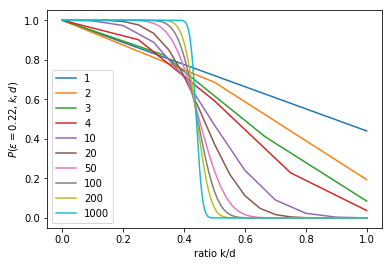

In [311]:
for d in ds:
    probs = face(eps, d)
    plt.plot(np.linspace(0,1,d+1), probs, label=d)
plt.legend()
plt.xlabel('ratio k/d')
plt.ylabel(r'$P(\varepsilon={},k,d)$'.format(eps))

## Fixed dimension
For a given dimension, plot the probability as a function of k and epsilon

In [321]:
resolution = 200
d = 100
epsilons = np.linspace(0,0.5, resolution)

In [322]:
probs = np.zeros([d+1, resolution])
for i, eps in enumerate(epsilons):
    probs[:,i] = face(eps,d)

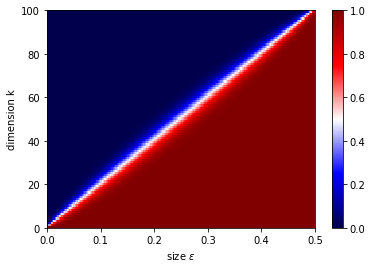

In [323]:
plt.pcolormesh(epsilons, np.arange(d+1), probs, alpha=1, cmap='seismic')
plt.colorbar()
plt.ylabel('dimension k')
plt.xlabel(r'size $\varepsilon$')
pass

The phase transition happens on the line $k/d = 2\varepsilon$, for all dimensions. This is verified for all dimensions $d$. Is this phenomenon simple to deduce from the formula? YES

Such a phase transition means that some coefficients of the sum $\sum_{j=0}^{k-1}\binom{d}{j} (2\varepsilon)^{j} (1-2\varepsilon)^{d-j}$ are much larger than the others. We can show that the maximum of these coeffecients happen asymptotically for $\alpha=2\varepsilon$. But first let us introduce a helpful lemma.

**Lemma:** Define $d\in \mathbb{N}$ and  $\mathbf{a} = (a_1,\dots, a_n) \in [0,1]^n$ such that $\sum_i a_i = 1$ and $a_1 d, \dots, a_n d \in \mathbb{N}$. $\mathbf{a}$ is probabilty vector whose coordinates are fractions of $d$. The multinomial coefficient $\binom{d}{a_1 d, \dots, a_n d}$ has the following asymptotic class when $d$ grows to infinity:
$$ \log \binom{d}{a_1 d, \dots, a_n d} = d H(\mathbf{a}) + O(\log d)$$
where $H(\mathbf{a}) = -\sum_i a_i \log(a_i)$ is the entropy of the probability vector $\mathbf{a}$.

*Proof of the lemma:* Write the definition 
$$\binom{d}{a_1 d, \dots, a_n d} = \frac{d!}{(a_1 d)! \dots (a_n d)!}$$
and use the stirling formula $\log(d!) = d(\log(d) - 1) + O(\log d)$.

*Back to the topic.* We take $j= ad$ some fraction $a\in[0,1]$ of $d$.
$$\begin{align}
\log\left( \binom{d}{j} (2\varepsilon)^{j} (1-2\varepsilon)^{d-j} \right) 
&= \log\left( \binom{d}{ad} (2\varepsilon)^{ad} (1-2\varepsilon)^{(1-a)d} \right) \\
&= d \left( a\log(2\varepsilon) + (1-a)\log(1- 2\varepsilon) + H(a) \right) + O(\log d) \\
&= - d \text{KL}(a || 2\varepsilon) + O(\log d)
\end{align}$$
where the Kullback-Leibler divergence between two Bernoullis appear.
This coefficient is approximately maximized when the divergence is minimized, eg when $a=k/d = 2\varepsilon$.